In [29]:
import pandas as pd
import numpy as np

In [30]:
df=pd.read_csv('Elon_musk.csv')

In [31]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [32]:
df.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [34]:
stop = pd.read_csv('stop.txt')

In [35]:
stop.head()

,x
0,0001f923
1,a
2,a's
3,able
4,about


In [37]:
df=df.drop('Unnamed: 0',axis=1)

In [9]:
df.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [10]:
tweets=df.copy()

In [11]:
import re
import string

In [12]:
def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)     
    text = text.lower()
    return text
tweets['Text']=df['Text'].apply(clean_text)
tweets

,Text
0,i’m an alien
1,ray tracing on cyberpunk with hdr is next-lev...
2,great interview!
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,"true, it sounds so surreal, but the negative ..."
1995,make sure to read ur terms &amp; conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is <u+0001f525><u+0001f...


In [38]:
def thorough_clean(text):
    text = re.sub('[^A-Za-z0-9]', ' ', text)
    return(text)

tweets['Text'] = tweets['Text'].apply(thorough_clean)
tweets

,Text
0,i m an alien
1,ray tracing on cyberpunk with hdr is next lev...
2,great interview
3,doge is underestimated
4,congratulations tesla china for amazing execu...
...,...
1994,true it sounds so surreal but the negative ...
1995,make sure to read ur terms amp conditions b...
1996,samwise gamgee
1997,altho dumb and dumber is u 0001f525 u 0001f...


In [17]:
uncleaned = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20]
uncleaned

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

In [18]:
stop = [x.strip() for x in stop.x] 
stop = [x for x in stop if x]
stop[0:10]

['0001f923',
 'a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually']

In [19]:
final_tweets=tweets.copy()

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords

In [40]:
final_tweets['Text']=tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [41]:
final_tweets

,Text,subjectivity,polarity
0,i m an alien,0.750000,-0.250000
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge is underestimated,0.000000,0.000000
4,congratulations tesla china for amazing execut...,0.900000,0.600000
...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111
1995,make sure to read ur terms amp conditions befo...,0.000000,0.000000
1996,samwise gamgee,0.000000,0.000000
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000


In [42]:
freq_cleaned = pd.Series(' '.join(final_tweets['Text']).split()).value_counts()[:20]
freq_cleaned

the     487
to      400
a       357
is      356
u       319
of      315
in      221
amp     219
it      194
for     194
s       173
we      172
will    165
be      157
that    149
this    140
i       137
on      129
rt      127
but     126
dtype: int64

In [43]:
# Count vectorizer also tells us the frequency and occurences of a word
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)
X = vectorizer.fit_transform(final_tweets["Text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

C:\Users\vinay\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

     term  occurrences  frequency
3526  the          487   0.029033
3578   to          400   0.023846
1931   is          356   0.021223
2454   of          315   0.018779
1827   in          221   0.013175


Text(0.5, 1.07, 'Most frequently used words by elon in tweets')

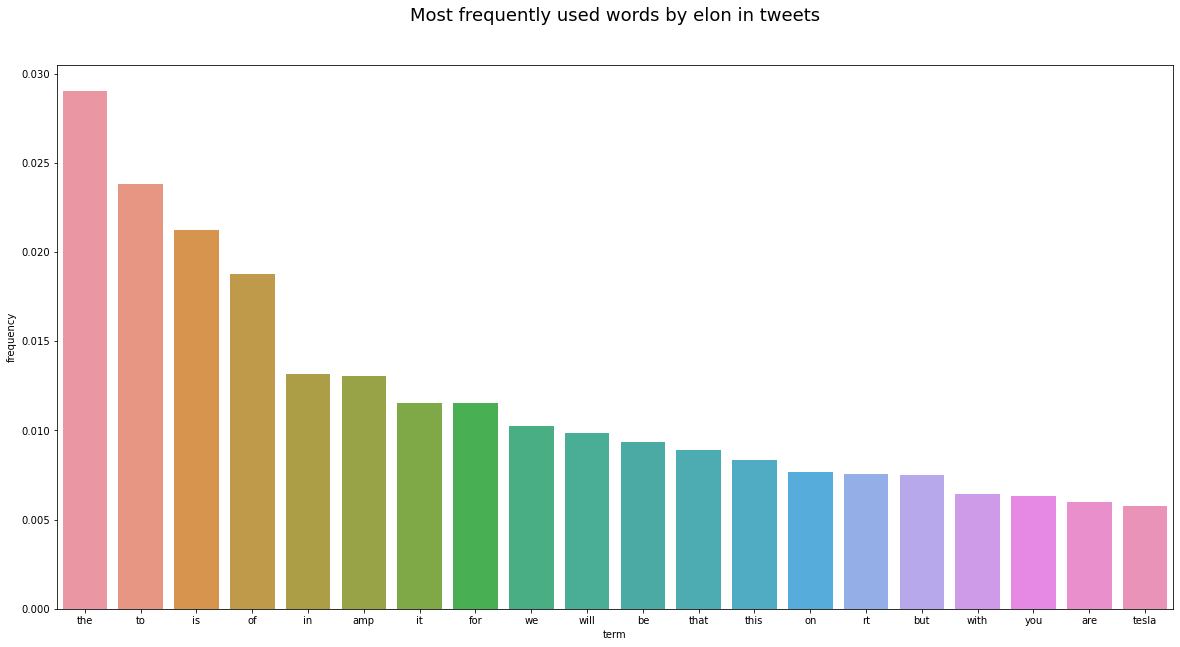

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20, 10))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20:])

plt.title("Most frequently used words by elon in tweets", y = 1.07, fontsize = 18)

In [71]:
string_Total = " ".join(final_tweets["Text"])

Text(0.5, 1.07, "Wordcloud of the words used in elon's tweets")

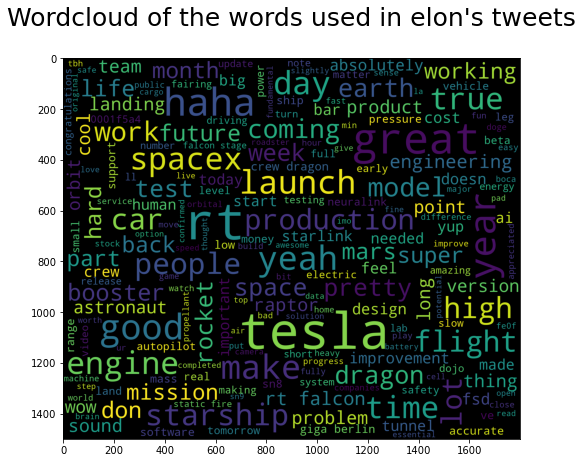

In [72]:
#wordcloud for entire corpus
fig = plt.figure(figsize = (15,7))
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500, random_state = 10, max_font_size = 200
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the words used in elon's tweets", y=1.07, fontsize=25)

In [81]:
final_tweets

,Text
0,alien
1,ray tracing cyberpunk hdr level
2,great interview
3,doge underestimated
4,congratulations tesla china amazing execution ...
...,...
1994,true sounds surreal negative propaganda easy f...
1995,make read ur terms conditions clicking accept
1996,samwise gamgee
1997,altho dumb dumber 0001f525 0001f525


In [50]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

final_tweets['subjectivity'] = final_tweets['Text'].apply(get_subjectivity)
final_tweets['polarity'] = final_tweets['Text'].apply(get_polarity)
final_tweets

,Text,subjectivity,polarity
0,i m an alien,0.750000,-0.250000
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge is underestimated,0.000000,0.000000
4,congratulations tesla china for amazing execut...,0.366667,0.275000
...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111
1995,make sure to read ur terms amp conditions befo...,0.888889,0.500000
1996,samwise gamgee,0.000000,0.000000
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000


In [51]:
def getanalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    elif score > 0:
        return 'Positive'

final_tweets['Analysis'] = final_tweets['polarity'].apply(getanalysis) 
final_tweets 

,Text,subjectivity,polarity,Analysis
0,i m an alien,0.750000,-0.250000,Negative
1,ray tracing on cyberpunk with hdr is next leve...,0.000000,0.000000,Neutral
2,great interview,0.750000,0.800000,Positive
3,doge is underestimated,0.000000,0.000000,Neutral
4,congratulations tesla china for amazing execut...,0.366667,0.275000,Positive
...,...,...,...,...
1994,true it sounds so surreal but the negative pro...,0.508333,0.111111,Positive
1995,make sure to read ur terms amp conditions befo...,0.888889,0.500000,Positive
1996,samwise gamgee,0.000000,0.000000,Neutral
1997,altho dumb and dumber is u 0001f525 u 0001f525,0.500000,-0.375000,Negative


In [52]:
positive_tweets = final_tweets[final_tweets['Analysis'] == 'Positive']
positive_tweets = positive_tweets.sort_values('polarity', ascending = False)
positive_tweets

,Text,subjectivity,polarity,Analysis
340,u 0001f3a9 the greatest gatsby u 0001f3a9,1.000000,1.000000,Positive
1409,a nightcap would probably work best,0.300000,1.000000,Positive
1080,one of the best shots ever,0.300000,1.000000,Positive
781,rt rumor has it that austin chalk is geologica...,0.300000,1.000000,Positive
1818,another government stimulus package is not in ...,0.300000,1.000000,Positive
...,...,...,...,...
1581,yes we re labeling bumps amp potholes so the c...,0.396296,0.014815,Positive
150,unlike its aircraft division which is fine the...,0.450000,0.008333,Positive
304,probably less than a few dozen primary decisio...,0.416667,0.008333,Positive
1073,prototypes are a piece of cake but high volume...,0.512071,0.001566,Positive


In [53]:
negative_tweets = final_tweets[final_tweets['Analysis'] == 'Negative']
negative_tweets = negative_tweets.sort_values('polarity', ascending = True)
negative_tweets

,Text,subjectivity,polarity,Analysis
1265,it will be very insane,1.000000,-1.000000e+00,Negative
1660,rt we are going to go to the moon we are going...,1.000000,-8.000000e-01,Negative
405,the writing on cobra kai is sick u 0001f44c,0.857143,-7.142857e-01,Negative
303,his sick beats,0.857143,-7.142857e-01,Negative
1573,i want to do electric vtol supersonic sooo bad...,0.666667,-7.000000e-01,Negative
...,...,...,...,...
881,well being a phased array antenna it is actual...,0.112500,-1.250000e-02,Negative
613,to be clear this was just an xpeng problem oth...,0.379167,-1.250000e-02,Negative
1416,giant gap between experimental medical device ...,0.566667,-4.166667e-03,Negative
746,would be great to hear from people who know a ...,0.650000,-1.850372e-17,Negative


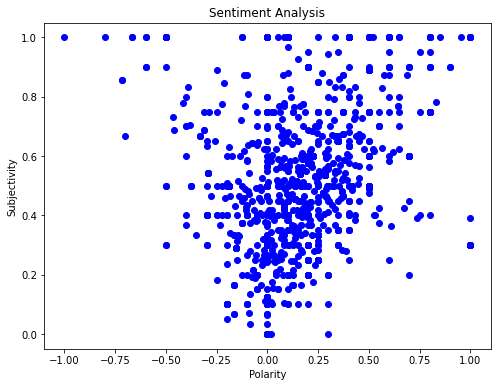

In [54]:
plt.figure(figsize=(8,6))
for i in range(0, final_tweets.shape[0]):
    plt.scatter(final_tweets.polarity[i], final_tweets.subjectivity[i], color = 'blue')

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [87]:
print("% of positive tweets:", round((positive_tweets.shape[0]/final_tweets.shape[0])*100, 1))
print("% of negative tweets:", round((negative_tweets.shape[0]/final_tweets.shape[0])*100, 1))

% of positive tweets: 31.7
% of negative tweets: 10.1


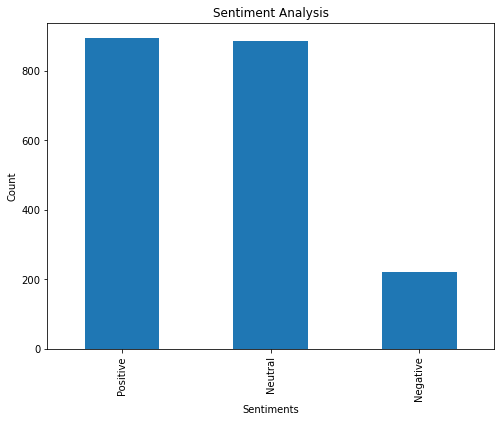

In [55]:
plt.figure(figsize=(8,6))
final_tweets['Analysis'].value_counts().plot(kind='bar')
plt.title("Sentiment Analysis")
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()